In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
df = pd.read_table('/Users/csstnns/Downloads/human_data.txt')

In [3]:
ATGCC TGCCC GCCCC CCCCA CCCAA

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


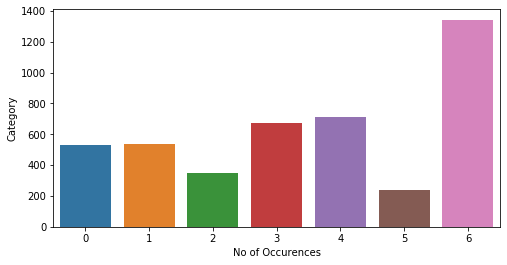

In [9]:
count = df['class'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(count.index, count.values)
plt.xlabel('No of Occurences')
plt.ylabel('Category');

In [11]:
df['length'] = df['sequence'].apply(len)

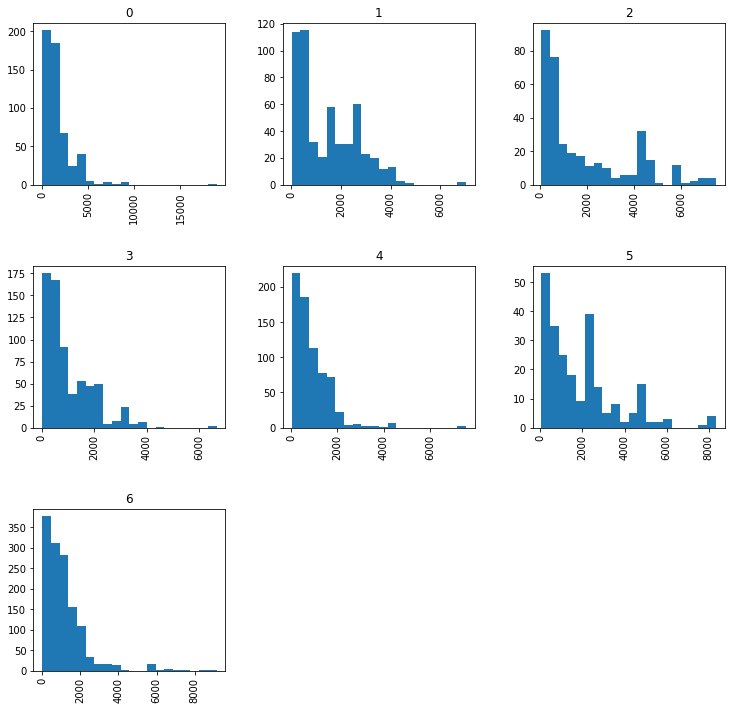

In [13]:
df.hist(column = 'length', by = 'class', bins = 20, figsize = (12,12));

In [14]:
def create_ngrams(seq, size = 6):
    return [seq[x:x+size] for x in range(len(seq) - size + 1)]
    

In [17]:
df['words'] = df['sequence'].apply(create_ngrams)

In [19]:
text = list(df['words'])

In [21]:
for i in range(len(text)):
    text[i] = ' '.join(text[i])

In [24]:
text[123]

'ATGATT TGATTA GATTAT ATTATA TTATAA TATAAG ATAAGC TAAGCA AAGCAC AGCACA GCACAC CACACC ACACCA CACCAC ACCACA CCACAG CACAGA ACAGAG CAGAGA AGAGAC GAGACT AGACTA GACTAA ACTAAC CTAACC TAACCA AACCAG ACCAGT CCAGTT CAGTTC AGTTCA GTTCAG TTCAGG TCAGGA CAGGAA AGGAAG GGAAGT GAAGTG AAGTGT AGTGTT GTGTTC TGTTCT GTTCTG TTCTGA TCTGAT CTGATT TGATTG GATTGG ATTGGG TTGGGA TGGGAG GGGAGT GGAGTC GAGTCC AGTCCA GTCCAT TCCATA CCATAT CATATA ATATAC TATACC ATACCC TACCCC ACCCCT CCCCTG CCCTGC CCTGCA CTGCAC TGCACC GCACCA CACCAG ACCAGC CCAGCA CAGCAA AGCAAT GCAATG CAATGG AATGGT ATGGTT TGGTTA GGTTAC GTTACT TTACTC TACTCA ACTCAG CTCAGA TCAGAC CAGACA AGACAC GACACA ACACAC CACACA ACACAT CACATA ACATAG CATAGC ATAGCA TAGCAG AGCAGA GCAGAA CAGAAG AGAAGC GAAGCT AAGCTA AGCTAC GCTACT CTACTG TACTGG ACTGGC CTGGCT TGGCTG GGCTGG GCTGGG CTGGGT TGGGTC GGGTCC GGTCCC GTCCCT TCCCTG CCCTGG CCTGGT CTGGTG TGGTGA GGTGAT GTGATA TGATAG GATAGA ATAGAA TAGAAA AGAAAA GAAAAC AAAACG AAACGG AACGGG ACGGGC CGGGCT GGGCTA GGCTAG GCTAGA CTAGAA TAGAAA AGAAAA GAAAA

In [26]:
df['text'] = text

In [27]:
df.head()

,sequence,class,length,words,text
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...


In [167]:
vectorizer = CountVectorizer(ngram_range=(4, 4))

In [168]:
X = vectorizer.fit_transform(df['text'])

In [169]:
tfidf_data = TfidfTransformer().fit_transform(X)

In [170]:
tfidf_data.shape

(4380, 232414)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, df['class'], test_size=0.25, random_state=42)

In [172]:
X_train.shape

(3285, 232414)

In [173]:
clf = MultinomialNB()

In [174]:
clf.fit(X_train, y_train)

MultinomialNB()

In [175]:
preds = clf.predict(X_test)

In [176]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(preds, name='Predicted')))


Confusion matrix

Predicted   0   1  2   3   4  5   6
Actual                             
0           3   0  3   3   2  3  15
1           4   4  2   7  12  4  10
2           2   2  1   3   6  2   9
3           4   4  2   5   8  3   7
4           4   8  6   4   5  4  13
5           2   4  1   1   2  0   2
6          13  17  8  14  18  6  25


In [177]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, preds)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


accuracy = 0.973 
precision = 0.973 
recall = 0.973 
f1 = 0.973
